In [1]:
# Import Libraries
import numpy as np

from project_utils.bb_model         import BB_Model
from project_utils.feature_stats    import Feature_Statistics
from project_utils.feature_stats    import Regression_Container
from project_utils.acq_data_capture import Acq_Data_1D
from project_utils.surroagte_gp     import Surrogate_GP



Num_Points = 1


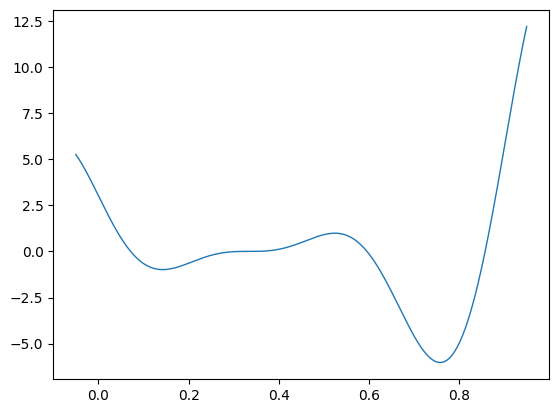

In [2]:
# Load Forrester model

Forrester_Data = BB_Model('Forrester')

#Forrester_Data.df().head()

In [3]:
Forrester_Data.MPL()

C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.16224656282956018


MLPRegressor(random_state=RandomState(MT19937) at 0x26907AA9840)

In [4]:
Forrester_Data.Random_Forest()

0.9998794344925795


RandomForestRegressor(random_state=RandomState(MT19937) at 0x26907AA9840)

In [5]:
Forrester_Data.GP()

0.9792935556570518


GaussianProcessRegressor()

In [6]:
print(Forrester_Data.get_features())

['X']


In [7]:
#Default settings
from unravel_2.ur_model import UR_Model

X_train, X_test, y_train, y_test = Forrester_Data.get_TT_data()

#Initializing the explainer object
URM_Exp = UR_Model(bbox_model           = Forrester_Data.get_GP(),
                   train_data           = X_train,
                   feature_names        = Forrester_Data.get_features(),
                   categorical_features = Forrester_Data.get_catagorical(),
                   mode                 = Forrester_Data.get_mode(),
                   sampling_optimize    = "opt")

#sur_GP = Surrogate_GP()


In [8]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
print('Mean 0:', mean)
print('Std 0: ', std)


Mean 0: [0.45269375]
Std 0:  [0.28593531]


In [9]:
# Generate explantion data for Random Forest

Forrester_Stats = Feature_Statistics(feature_names = Forrester_Data.get_features(), mode = Forrester_Data.get_mode())

if Num_Points == 0: Num_Points = X_test.shape[0]

for test_instance in range(Num_Points):

    print('INSTANCE: ', test_instance)
       
#    data_row  = np.array([X_test[test_instance]])
    data_row  = np.array([0.4])
    print('data row ',data_row)
    
    #scores, acq_data = URM_Exp.explain(X_init            = data_row.reshape(1, -1),
    scores = URM_Exp.explain(X_init      = data_row.reshape(-1, 1),
                             Dimension   = 'One_For',
                             kernel_type = "Matern",
                             max_iter    = 20,
                             alpha       = "FUR_W",
                             #jitter=5,
                             interval    = 1,
                             normalize   = False)
       
    f_predict = Forrester_Data.get_Random_Forest().predict(data_row.reshape(1, -1))

    e_predict = URM_Exp.exp_predict(data_row.reshape(-1, 1))
    e_predict = np.array(e_predict).ravel()
    
    acq_data = URM_Exp.get_acq_data()
    
#    X, y = URM_Exp.get_surrogate_data()

#    e_predict = sur_GP.predict(X, y)
#    e_predict = sur_GP.predict(URM_Exp.get_surrogate_data())

    print(f_predict, e_predict)
    
    Forrester_Stats.Add_Sample(sample_scores = scores,
                               outcome       = y_test[test_instance],
                               X_row         = data_row,
                               f_prediction  = f_predict,
                               e_prediction  = e_predict.ravel(),
                               feopt         = acq_data.get_fe_x0(),
                               model         = URM_Exp.get_exp_model())


INSTANCE:  0
data row  [0.4]
Acq_Data_1D_For
SHAPE0:  (0, 3)
ITER: 0
XX:  [[0.11406469]] [0.1]
MIN: 0.20018470426475538 -0.013803231698556628 0.213987935963312
XX:  [[0.11406469]] [0.11]
MIN: 0.1994865303502024 -0.008803231698556624 0.20828976204875901
XX:  [[0.11406469]] [0.12]
MIN: 0.19869524587821646 -0.0038032316985566195 0.20249847757677308
MINXX: (0.19917617718147382, -0.0067708853487246645, 0.20594706253019848)
SHAPE:  (1, 3)


C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Opt iteration fail:  ABNORMAL_TERMINATION_IN_LNSRCH
Opt iteration fail:  ABNORMAL_TERMINATION_IN_LNSRCH
ITER: 1
XX:  [[0.65864296]] [0.65]
MIN: 0.4956785187821912 -0.004321481217808787 0.5
XX:  [[0.65864296]] [0.66]
MIN: 0.4993214812178088 -0.0006785187821912175 0.5
XX:  [[0.65864296]] [0.67]
MIN: 0.4943214812178088 -0.005678518782191222 0.5
MINXX: (0.49999999962881436, -3.711856377819345e-10, 0.5)
SHAPE:  (2, 3)


C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Opt iteration fail:  ABNORMAL_TERMINATION_IN_LNSRCH
Opt iteration fail:  ABNORMAL_TERMINATION_IN_LNSRCH
ITER: 2
XX:  [[0.33569579]] [0.33]
MIN: 0.4971521050071839 -0.0028478949928161176 0.5
XX:  [[0.33569579]] [0.34]
MIN: 0.4978478949928161 -0.002152105007183887 0.5
XX:  [[0.33569579]] [0.35]
MIN: 0.4928478949928161 -0.007152105007183891 0.5
MINXX: (0.4999999994131458, -5.868541694264984e-10, 0.5)
SHAPE:  (3, 3)


C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


ITER: 3
XX:  [[0.41784111]] [0.41]
MIN: 0.4960794427835413 -0.003920557216458695 0.5
XX:  [[0.41784111]] [0.42]
MIN: 0.4989205572164587 -0.001079442783541282 0.5
XX:  [[0.41784111]] [0.43]
MIN: 0.4939205572164587 -0.0060794427835412865 0.5
MINXX: (0.49999999999987654, -1.2343771838008166e-13, 0.5)
SHAPE:  (4, 3)
ITER: 4
XX:  [[0.2325866]] [0.22]
MIN: 0.3977559847194604 -0.029086272280412294 0.42684225699987266
XX:  [[0.2325866]] [0.23]
MIN: 0.40167951758426634 -0.02408627228041229 0.4257657898646786
XX:  [[0.2325866]] [0.24]
MIN: 0.40040450712716974 -0.0190862722804123 0.41949077940758206
MINXX: (0.40185366848665366, -0.022792972438266022, 0.42464664092491966)
SHAPE:  (5, 3)
ITER: 5
XX:  [[0.28638741]] [0.28]
MIN: 0.11840770655577404 -0.07359153682017014 0.19199924337594418
XX:  [[0.28638741]] [0.29]
MIN: 0.12052331421173523 -0.06859153682017016 0.1891148510319054
XX:  [[0.28638741]] [0.3]
MIN: 0.10765059951060701 -0.06359153682017016 0.17124213633077717
MINXX: (0.12150867495266543, -0

In [10]:
import matplotlib.pyplot as plt


In [11]:
print(f_predict)
print(e_predict)


[0.11467103]
[6.11467361e-01 1.00000004e-05]


In [12]:
Forrester_Stats.Fidelity()

Average, Var, and Max Differences:
y - BB(x):           1.0881658070998452  :  0.0  :  1.0881658070998452
y - exp(x):          1.584962137528315  :  0.0  :  1.584962137528315
BB(x) - exp(x):      0.4967963304284697  :  0.0  :  0.4967963304284697
Average exp(x) var:  1.0000000413701846e-05


In [13]:
#Forrester_Stats.Jaccard_Values()

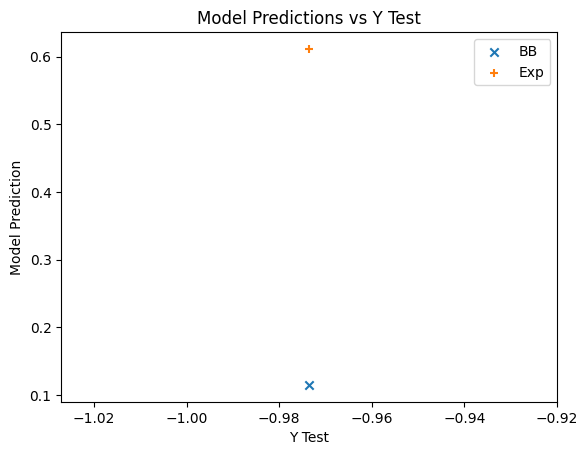

In [14]:
Forrester_Stats.Reg_Fidelity_Graph()

In [15]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RBF

#X, y = URM_Exp.get_surrogate_data()
#kernel = Matern()

#GP = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer = 10, optimizer='fmin_l_bfgs_b', normalize_y = False, copy_X_train=True)
#GP.fit(X, y)
        
#print(y[0])
#fe = GP.predict(X[0].reshape(1,-1))
#print(fe)
#ey = URM_Exp.gpmodel_predict(X[0].reshape(1,-1))
#print(ey)


In [16]:
#acq_data.Create_BB_plot()

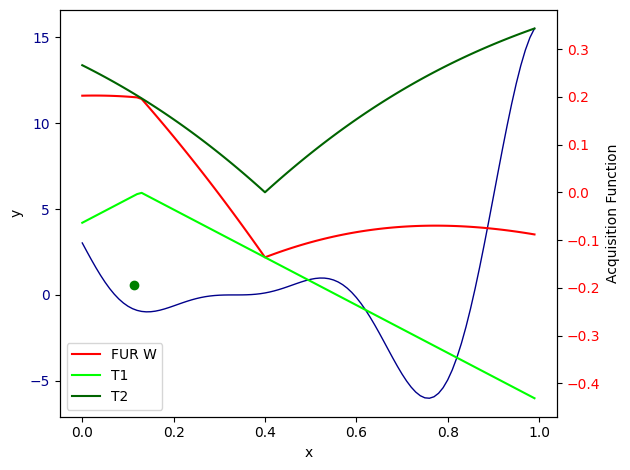

In [17]:
acq_data.plot_point(0)

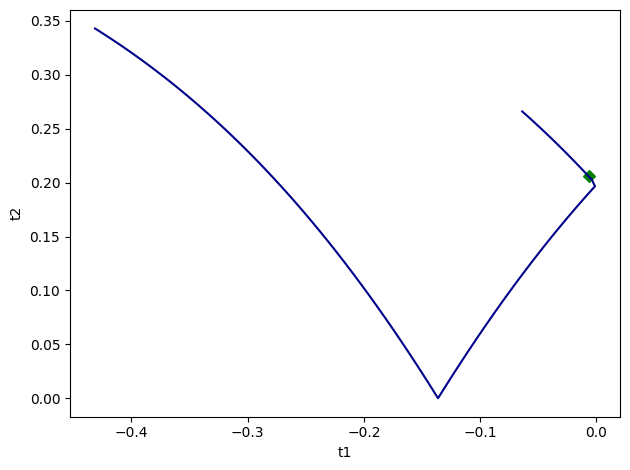

In [18]:
acq_data.plot_t1_t2(0)

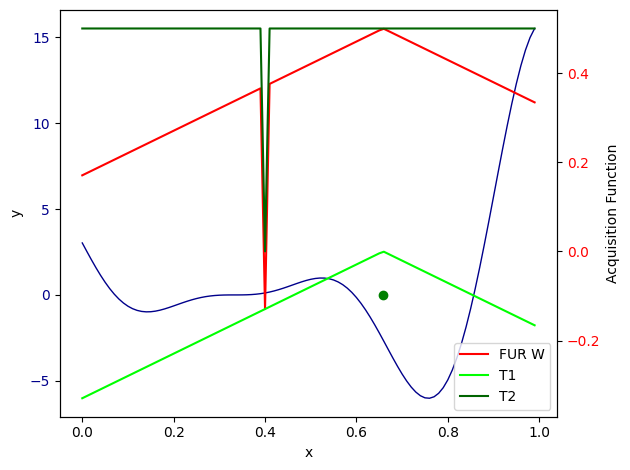

In [19]:
acq_data.plot_point(1)

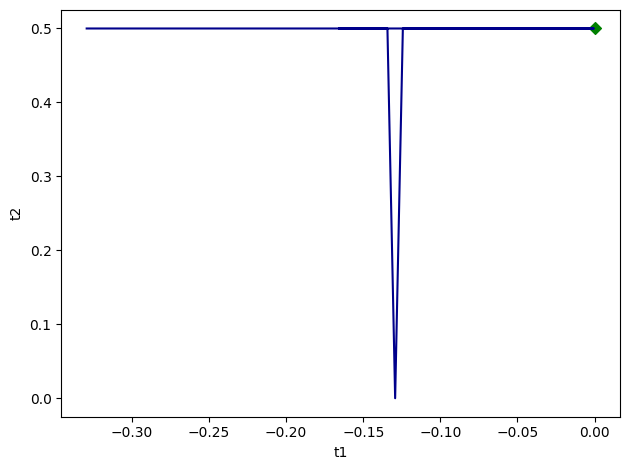

In [20]:
acq_data.plot_t1_t2(1)

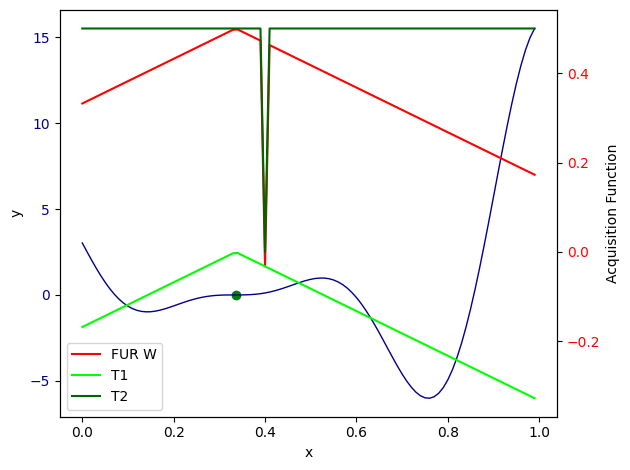

In [21]:
acq_data.plot_point(2)

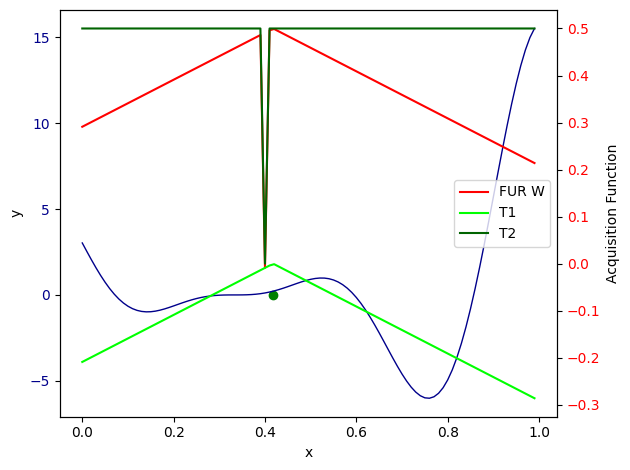

In [22]:
acq_data.plot_point(3)

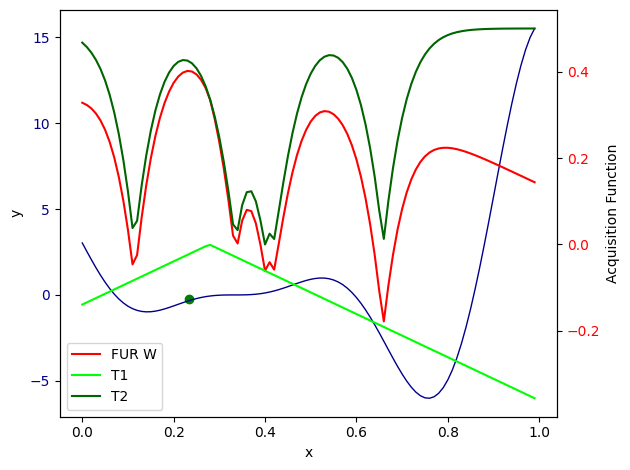

In [23]:
acq_data.plot_point(4)

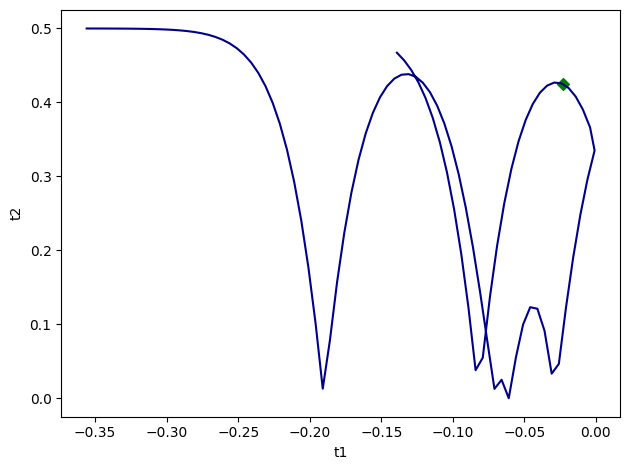

In [24]:
acq_data.plot_t1_t2(4)

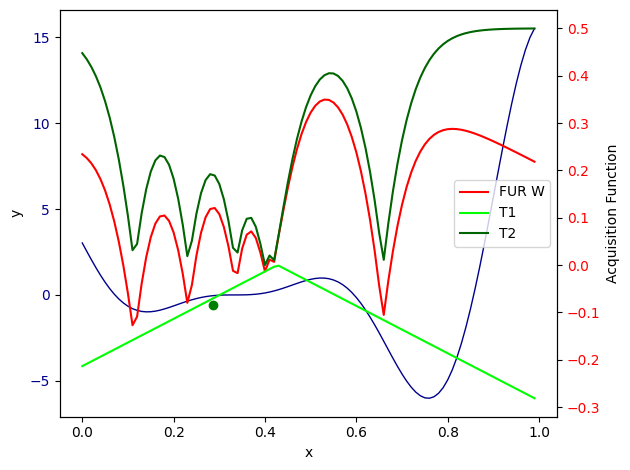

In [25]:
acq_data.plot_point(5)

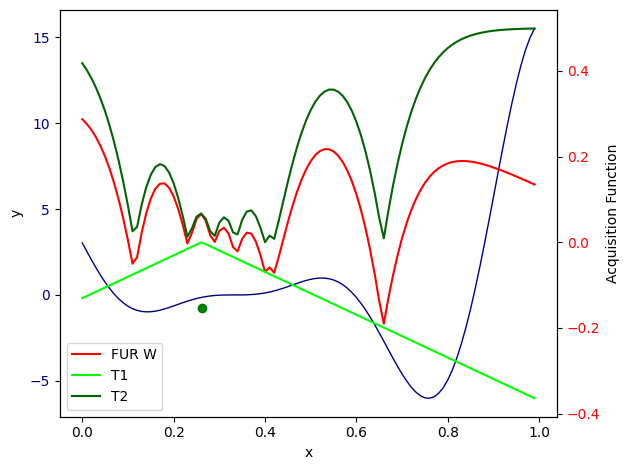

In [26]:
acq_data.plot_point(6)

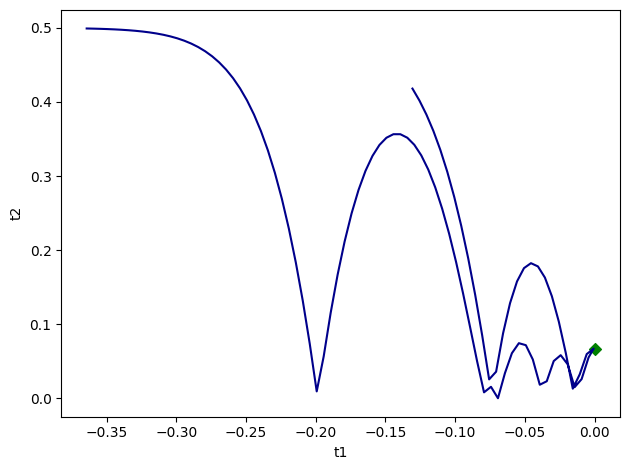

In [27]:
acq_data.plot_t1_t2(6)

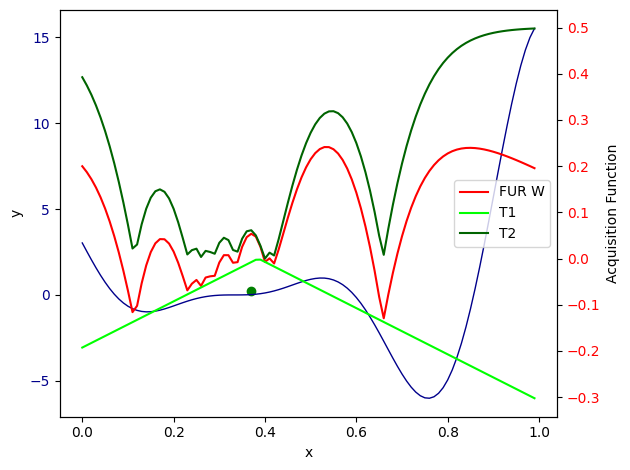

In [28]:
acq_data.plot_point(7)

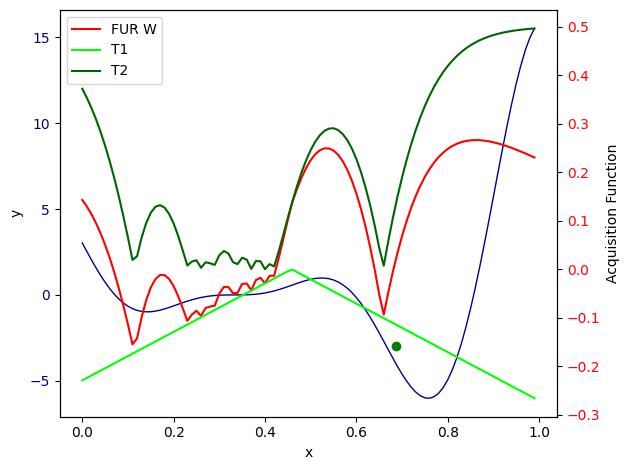

In [29]:
acq_data.plot_point(8)

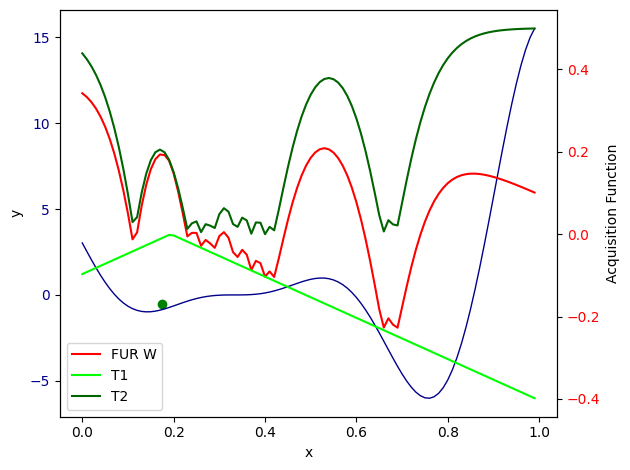

In [30]:
acq_data.plot_point(9)

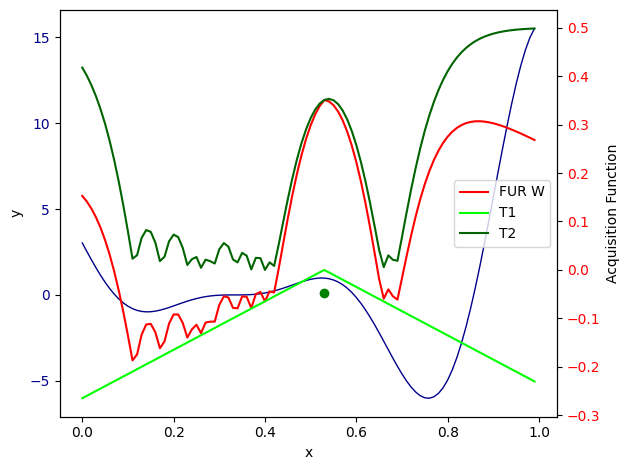

In [31]:
acq_data.plot_point(10)

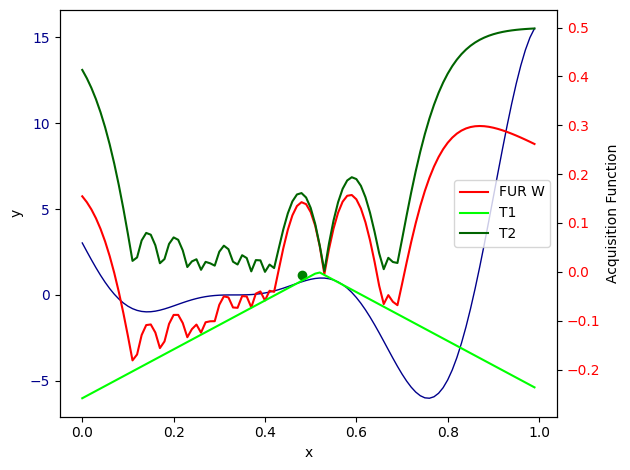

In [32]:
acq_data.plot_point(11)

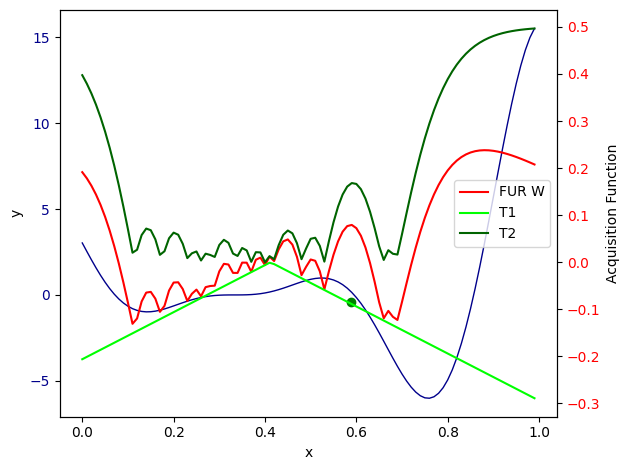

In [33]:
acq_data.plot_point(12)

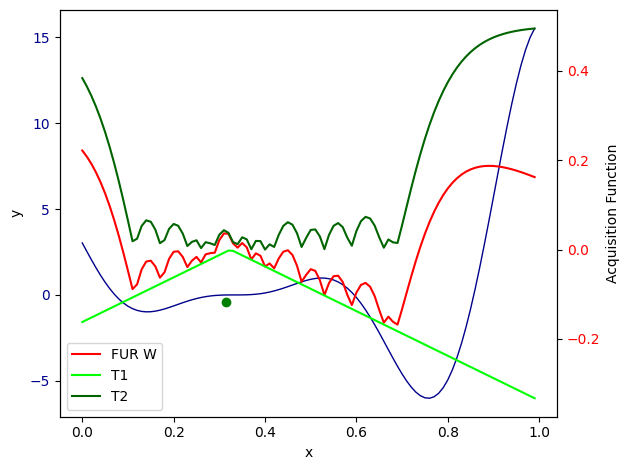

In [34]:
acq_data.plot_point(13)

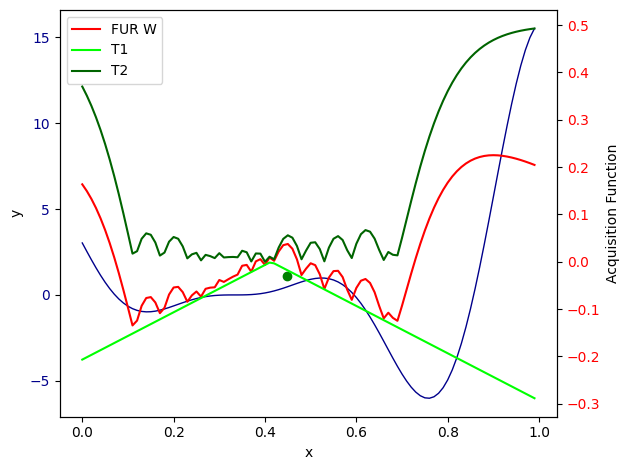

In [35]:
acq_data.plot_point(14)

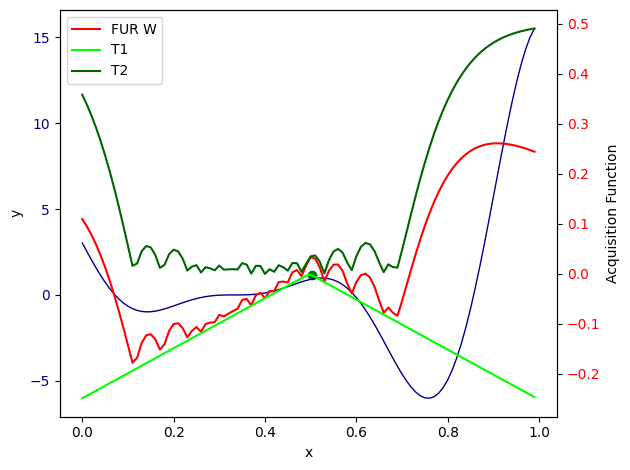

In [36]:
acq_data.plot_point(15)

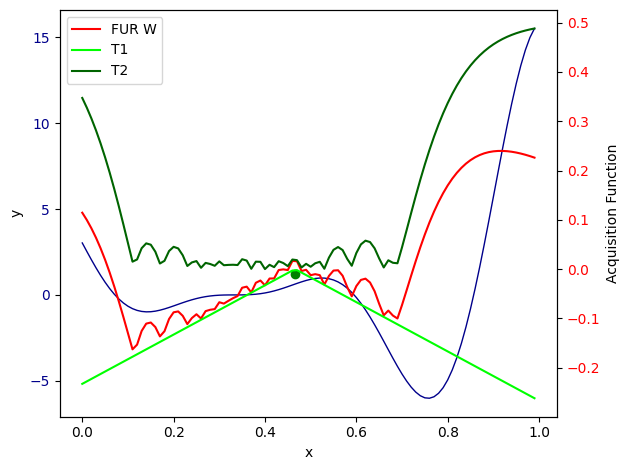

In [37]:
acq_data.plot_point(16)

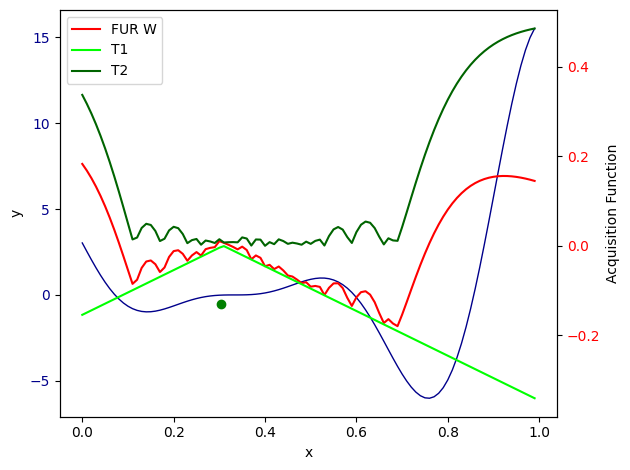

In [38]:
acq_data.plot_point(17)

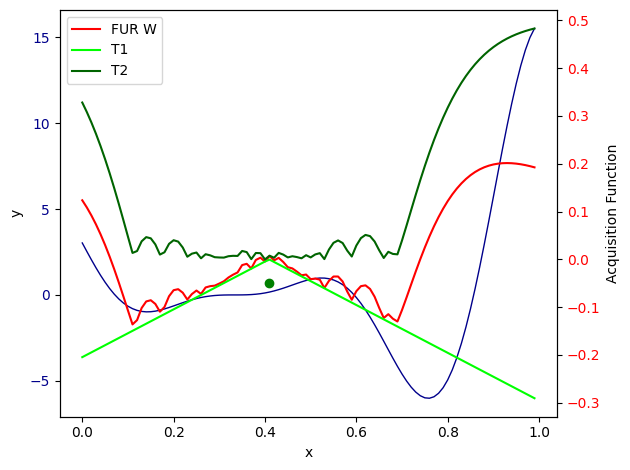

In [39]:
acq_data.plot_point(18)

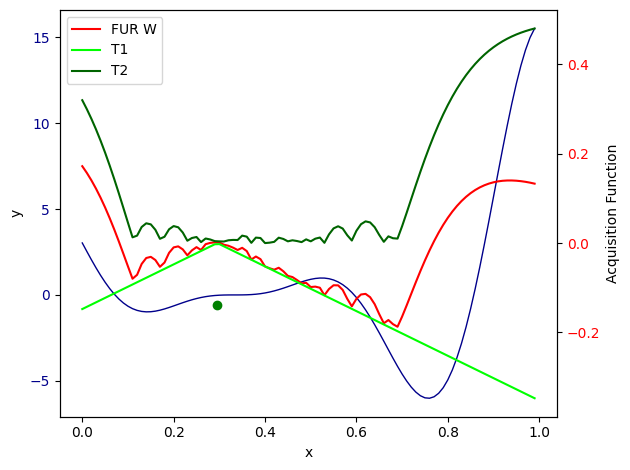

In [40]:
acq_data.plot_point(19)

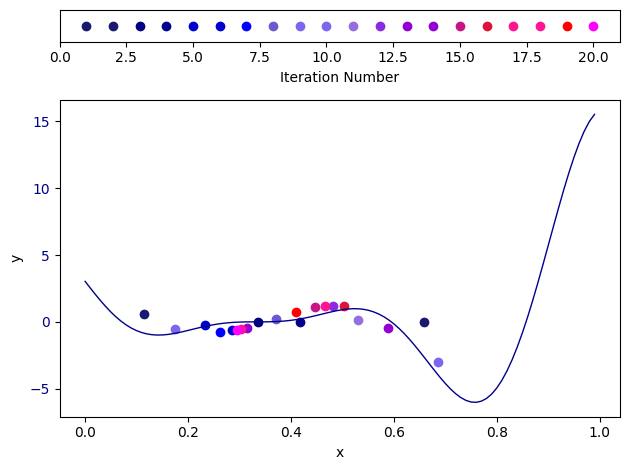

In [41]:
acq_data.plot_all()